## Linear model selection and model regularization

선형모형을 다시 돌아보자.

$$ Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \epsilon $$

선형모형은 간단함에도 불구하고, interpretablity가 좋고, 종종 좋은 predictive performance를 보인다.

이 장에서는 선형모형의 기본적인 장점은 유지하면서 단점을 보완하는 대안들을 살펴본다.

### Why consider alternatives?

* Prediction accuracy : 만약 $p > n$인 경우, 일반적인 least square estimation을 적용할 수 없다. 추정될 모수의 수를 제한하여 추정량의 분산을 줄이고 예측 정확성을 높인다.

* Model interpretability : 불필요한 feature 변수를 제외하여 모형을 보다 해석 가능하도록 만든다. feature selection 혹은 variable selection이 자동으로 이루어지는 방법에 대해 알아본다.

### 세가지 방법

* Subset selection : $p$개의 predictor 중에서 반응변수와 연관이 있을 것으로 생각되는 부분 집합을 식별하는 방법.

* Shrinkage (regularization) : $p$개의 predictor를 모형 적합에 사용하지만, 그 중의 일부 predictor들의 해당되는 계수는 0 혹은 0과 매우 가까운 값으로 추정된다. 

* Dimension reduction : $p$개의 predictor를 $M$-dimensional subspace로 투영하는 방법.

### Subset selection

$p$개의 predictor가 있을 때, $k=1, 2, \cdots, p$에 대하여 다음을 실행한다.

* 각 $k$에 대하여 정확히 $\binom{p}{k}$개의 가능한 모형이 있다. 이 모형들에 대해 모두 적합을 진행한다.

  * 각 $k$에 대하여 적합된 모형 중 가장 적합이 잘된 모형이 있을 것이다. 이를 $\mathcal M_k$라 하자.
  
  * 한편 predictor가 없는 단순한 평균 모형은 $\mathcal M_0$라고 하겠다.
  
* $\mathcal M_0, \mathcal M_1, \cdots, \mathcal M_p$ 중에서 best인 모형을 찾는다. 

  * Best를 찾기 위해서 cross-validated prediction error, $C_p$ (AIC), BIC 혹은 adjusted $R^2$ 등이 이용될 수 있다.

### Shrinkage methods

적절한 constraint 혹은 regularization 방법을 통해 불필요한 추정치를 0으로 가깝게 만드는 방법이다.

#### Ridge regression

Least square 방식을 다시 돌아보자. 이 방법에서는 다음을 최소화하는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \mathrm{RSS} = \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 $$

반면 ridge regression에서는 다음을 최소화하는 $\beta$들의 값을 찾는다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 = \mathrm{RSS} + \lambda \sum_{j=1}^{p} \beta_j^2 $$

여기서 $\lambda \geq 0 $으로 tuning parameter라고 불리운다.

이 추정량을 $\hat \beta^{R}$이라 하겠다.

$\lambda \sum_{j=1}^{p} \beta_j^2$는 shrinkage penalty라고 불리우며, $\beta$들이 0에 가까울수록 작아진다.

적절한 $\lambda$를 선택하는 것이 중요하며 이는 cross-validation 방법을 통해 선택한다.

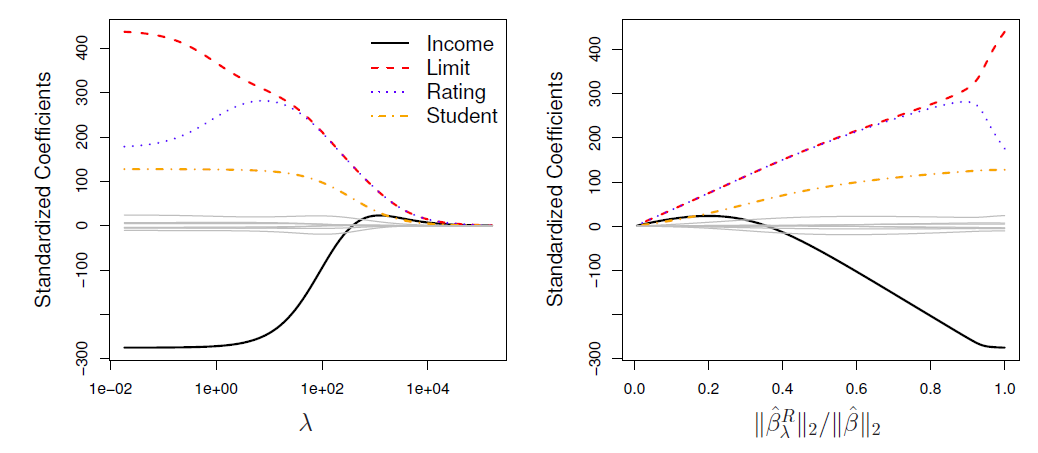

위 그림의 왼쪽에서 보듯 $\lambda$가 커지면 결국 모든 $\beta$들의 추정치는 0에 가까워진다.

오른쪽 그림에서는 x-축에 $ \dfrac{|| \hat \beta_\lambda^R ||_2}{|| \hat \beta ||_2} $를 표현하였다.

여기서 $|| \cdot ||_2$는 $\ell_2$-norm으로서 다음으로 정의한다.

$$ || \beta ||_2 = \sqrt{\sum_{j=1}^{p} \beta_j^2} $$

한편, ridge regression에서는 predictor들을 표준화하여 모형을 적합하는 것이 좋다.

$$ \tilde x_{ij} = \frac{x_{ij}}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \bar x_j)^2}} $$

#### Bias-variance tradeoff

50개의 데이터와 45개의 predictor를 이용한 시뮬레이션 실험. 실험에서는 모두 non-zero coefficient를 가정하였다.

아래 그림에서 검은 선이 squared bias, 초록색이 variance, test error가 자주색이다.

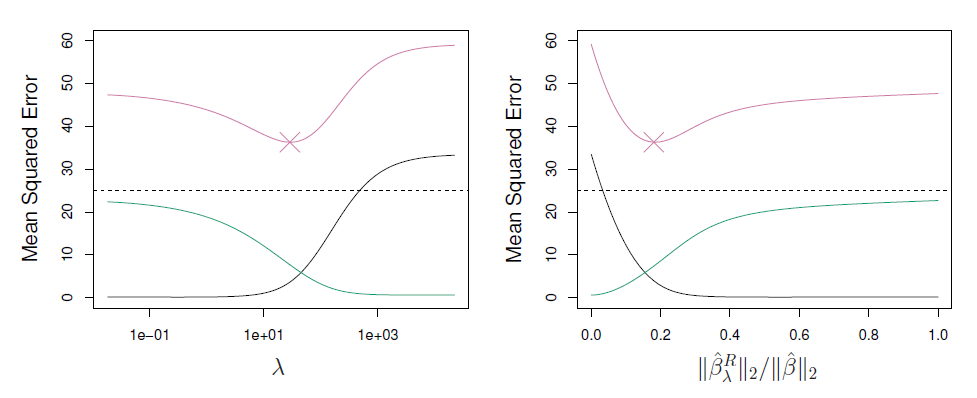

### Lasso 

Ridge regression은 $\lambda$에 따라 coefficient들의 값을 0에 가깝게 보내기는 하지만 완전히 0이 되는 것이 아니기 때문에 최종 모형에는 결국 총 $p$개의 predictor들이 모두 포함된다.

Lasso는 ridge의 대안으로, 다음을 최소화하는 $\beta$들을 찾으며 이를 $\hat \beta_\lambda^L$이라고 하겠다.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} |\beta_j| = \mathrm{RSS} + \lambda \sum_{j=1}^{p} |\beta_j| $$

통계적 용어로 이야기하자면, lasso는 $\ell_1$ penalty를 사용하고 ridge는 $\ell_2$ penaltiy를 사용하는 것이다.

Ridge와 마찬가지로 lasso 또한 coefficient 추정치를 0으로 보내지만 ridge와 달리 $\lambda$가 충분히 크면 완전히 0의 값이 된다.

따라서 lasso는 일종의 variable selection 역할을 한다.

Lasso는 sparse 모형을 만들어낸다고도 한다.

마찬가지로 적절한 $\lambda$의 값을 선택하는 것이 중요하며 cross-validation 방법이 이용된다.

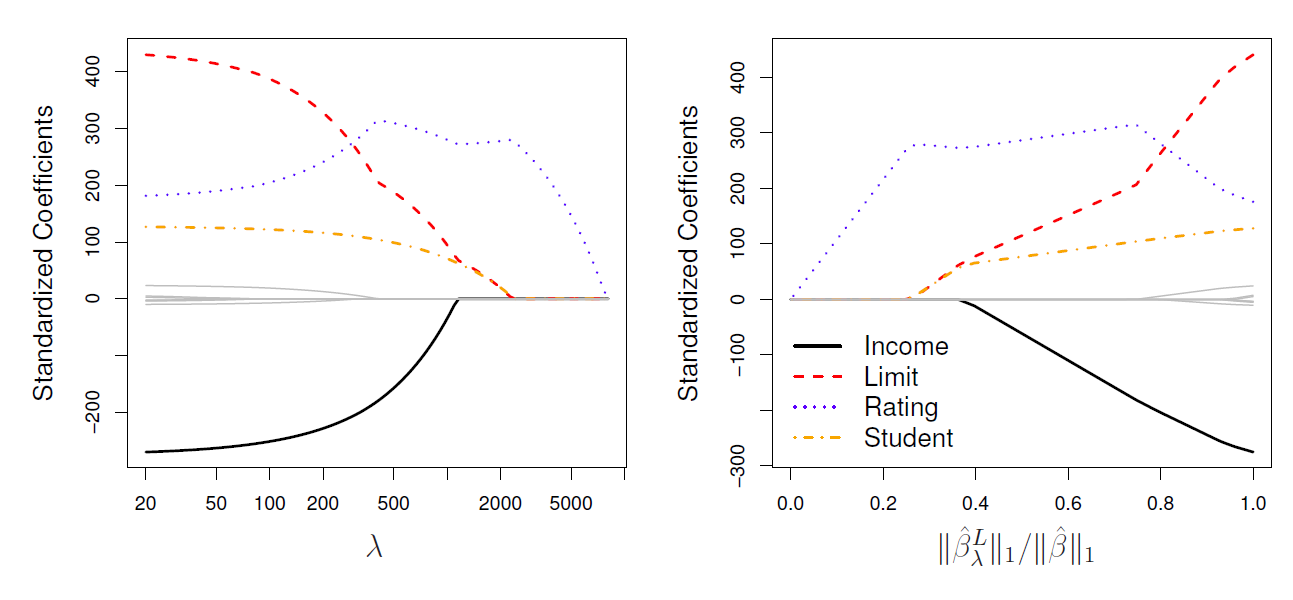

#### Ridge와 Lasso의 차이

Lasso와 ridge regression은 각각 결국 다음의 문제를 해결하는 것과 같다.

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} |\beta_j| \leq s $$

$$ \arg \min_{\beta} \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2  \text{ subject to }  \sum_{j=1} \beta_j^2 \leq s $$

그림으로 표현하자면 다음과 같으며, 단순히 Ridge와 Lasso 중 어느 것이 더 낫다고 결론을 지을 수는 없다.

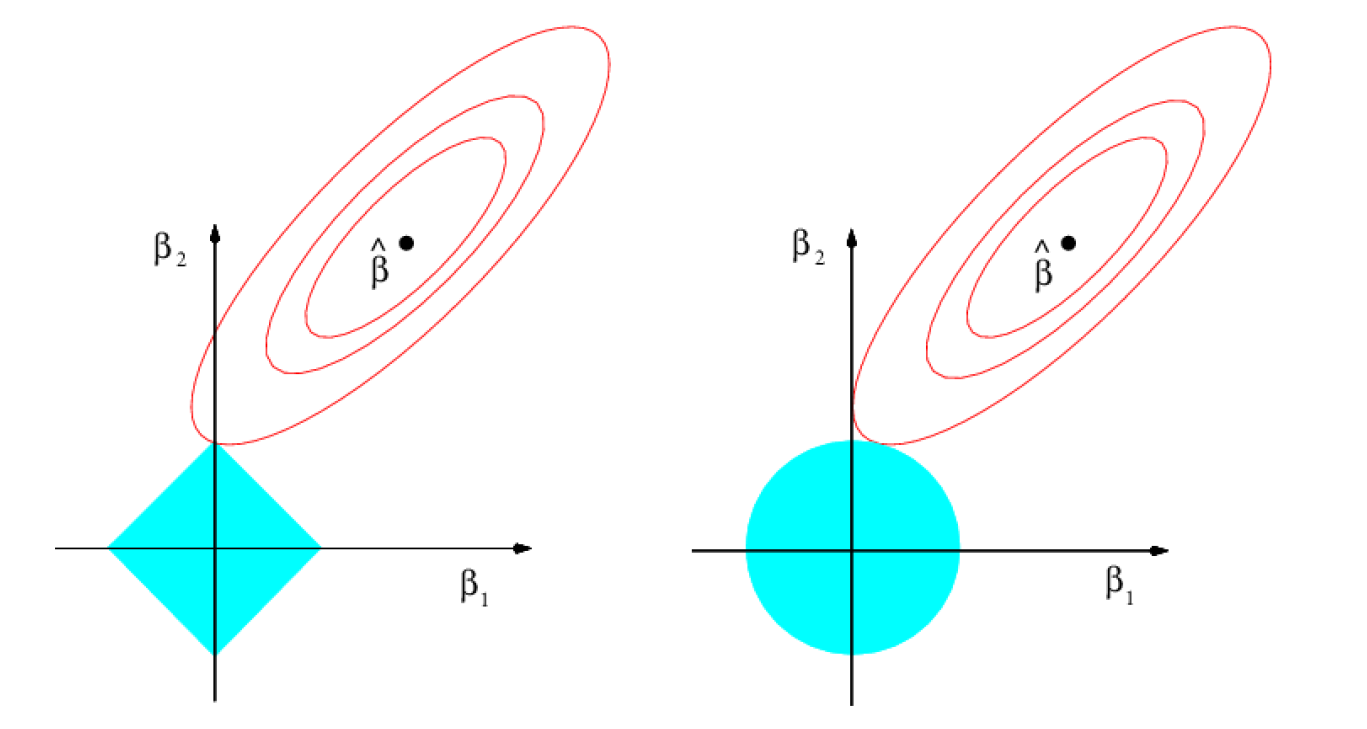

#### 모형 선택

앞서 이야기했듯이 $\lambda$는 cross-validation 방법을 통해 정한다.

아래는 ridge regression의 cross-validation 방법을 통해 선택한 $\lambda$의 예제이다.

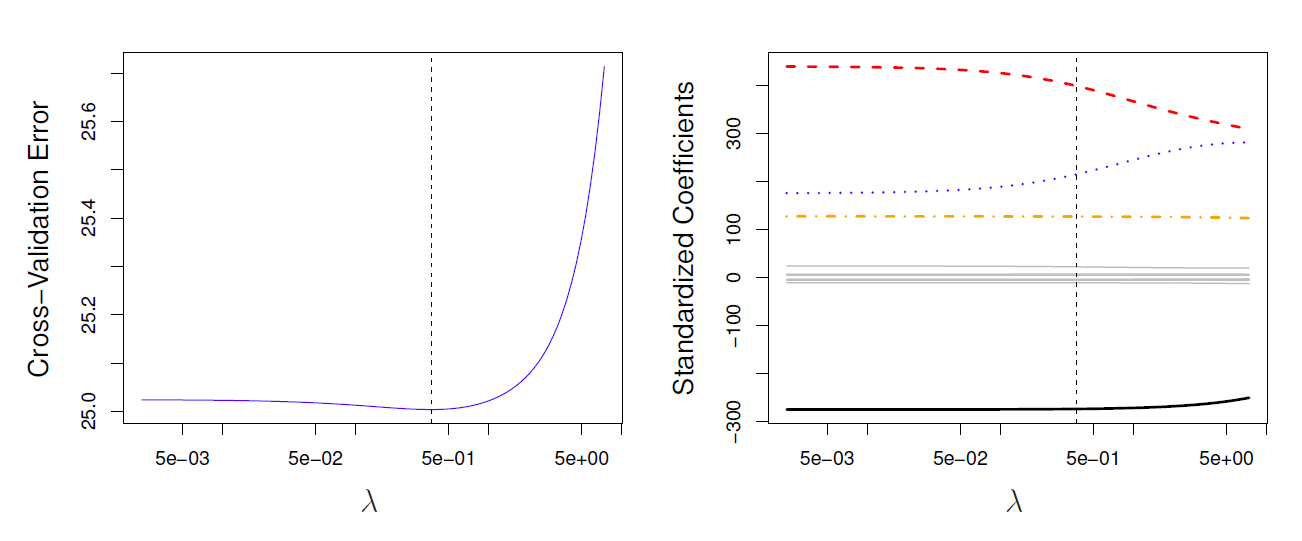

아래는 lasso에서 10-fold cross-validation을 이용하여 $\lambda$의 값을 정하는 예제이다.

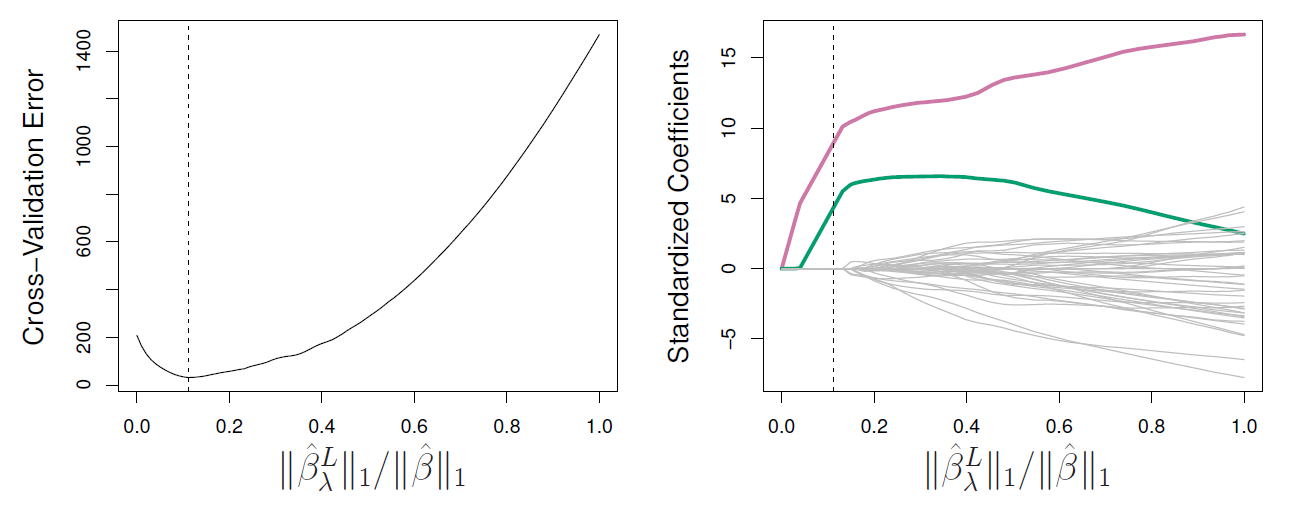

### 엘라스틱넷 (elastic net)

Ridge와 Lasso를 절충한 모델.

$$ \sum_{i=1}^{n} \left( y_i - \beta - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + r \lambda \sum_{j=1}^{p} |\beta_j| + \frac{1-r}{2} \lambda \sum_{j=1}^{p} \beta_j^2$$

혼합 정도는 혼합 비율 $r$을 조절하여 사용한다.

### sklearn 예제

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [2]:
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
pd.DataFrame(y)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [4]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [5]:
pd.DataFrame(X_tn)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
1,0.26363,0.0,8.56,0.0,0.520,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
2,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79
3,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
4,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2.33099,0.0,19.58,0.0,0.871,5.186,93.8,1.5296,5.0,403.0,14.7,356.99,28.32
375,0.16211,20.0,6.96,0.0,0.464,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59
376,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45
377,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56


In [6]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [7]:
pd.DataFrame(X_tn_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.380714,-0.496727,2.271822,-0.265747,0.290203,-0.488684,0.926495,-0.887666,-0.849318,-1.290098,0.320897,0.242239,0.810469
1,-0.358599,-0.496727,-0.329770,-0.265747,-0.246520,-0.088121,0.866919,-0.666428,-0.494421,-0.094494,1.149809,0.382714,0.462705
2,1.266365,-0.496727,1.122494,-0.265747,1.689201,-0.648610,1.056159,-0.980034,1.753259,1.625712,0.827454,-1.228471,1.666728
3,-0.386695,-0.496727,-1.113750,-0.265747,-0.519281,0.192872,-0.012696,-0.402218,-0.849318,-0.789896,-0.277762,0.392870,-0.522139
4,0.130598,-0.496727,1.122494,-0.265747,-0.140935,-0.088121,0.849397,-0.398838,1.753259,1.625712,0.827454,0.426545,0.071105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.090677,-0.496727,1.347793,-0.265747,2.841835,-1.647030,0.958035,-1.156753,-0.494421,0.021406,-1.705333,0.016666,2.328648
375,-0.371756,0.365860,-0.573337,-0.265747,-0.739249,-0.071680,-1.757907,0.243196,-0.731019,-1.076597,0.090643,0.443329,-0.846524
376,0.233920,-0.496727,1.122494,-0.265747,0.307800,-0.572384,-0.464768,-0.373247,1.753259,1.625712,0.827454,0.350535,-0.136384
377,-0.368047,0.452118,-0.740789,-0.265747,-1.029607,0.642758,-1.715854,1.883649,-0.257823,-0.423895,0.320897,0.409547,-0.850908


In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_tn_std, y_tn)

LinearRegression()

In [9]:
print(lr.coef_, lr.intercept_)

[-0.92036451  1.03562473  0.19866946  0.59919135 -1.89492822  2.34313063
  0.15149706 -3.01841767  2.29148795 -1.47186024 -2.25251307  1.14853983
 -3.85858959] 22.687862796833812


### sklearn에서의 Ridge, Lasso regression

[```sklearn.linear_model.Ridge```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

minimize ```||y - Xw||^2_2 + alpha * ||w||^2_2```

In [10]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_tn_std, y_tn)
print(ridge.coef_, ridge.intercept_)

[-0.91179575  1.01977424  0.17111967  0.60431242 -1.85823361  2.35350625
  0.14004986 -2.98614401  2.21358783 -1.40003311 -2.23822708  1.14871366
 -3.84110395] 22.687862796833812


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_tn_std, y_tn)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_te, ridge.predict(X_te_std)))

In [12]:
pd.DataFrame(coefs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.920276,1.035461,0.198381,0.599245,-1.894554,2.343237,0.151380,-3.018091,2.290678,-1.471108,-2.252367,1.148542,-3.858413
1,-0.919486,1.033994,0.195801,0.599724,-1.891191,2.344196,0.150325,-3.015157,2.283420,-1.464370,-2.251060,1.148561,-3.856826
2,-0.916022,1.027575,0.184586,0.601808,-1.876395,2.348395,0.145700,-3.002190,2.251778,-1.435108,-2.245302,1.148637,-3.849807
3,-0.911796,1.019774,0.171120,0.604312,-1.858234,2.353506,0.140050,-2.986144,2.213588,-1.400033,-2.238227,1.148714,-3.841104
4,-0.881555,0.964898,0.081602,0.621036,-1.724992,2.389530,0.099486,-2.864060,1.953185,-1.168735,-2.185928,1.148596,-3.774181
5,-0.850507,0.910407,0.001894,0.635956,-1.583441,2.424679,0.057933,-2.725802,1.708734,-0.966430,-2.129191,1.146840,-3.696514
6,-0.713333,0.697573,-0.227712,0.671993,-0.960642,2.512581,-0.110431,-1.985052,0.862435,-0.438352,-1.841491,1.099270,-3.227572
7,-0.633520,0.601086,-0.302480,0.663847,-0.663353,2.449192,-0.186113,-1.490948,0.496787,-0.334539,-1.641370,1.019547,-2.842220
8,-0.448443,0.450221,-0.404305,0.480468,-0.349495,1.660159,-0.289505,-0.404527,-0.092507,-0.356078,-1.034371,0.650994,-1.639391
9,-0.366452,0.380970,-0.388634,0.340828,-0.316649,1.166908,-0.290075,-0.117938,-0.195172,-0.351880,-0.751565,0.479893,-1.145351


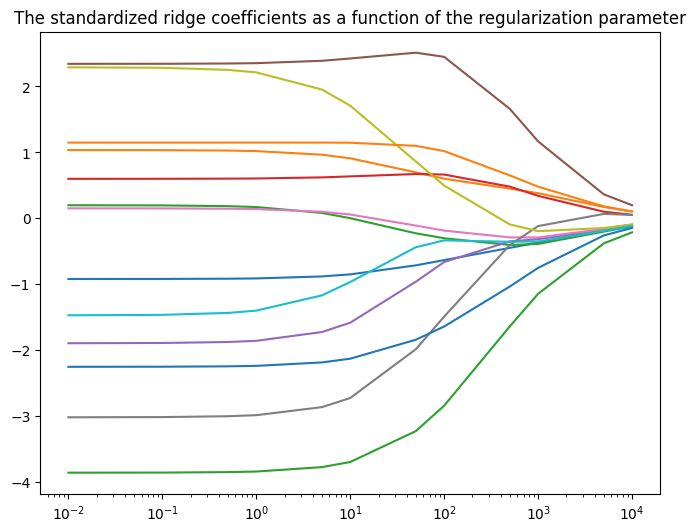

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

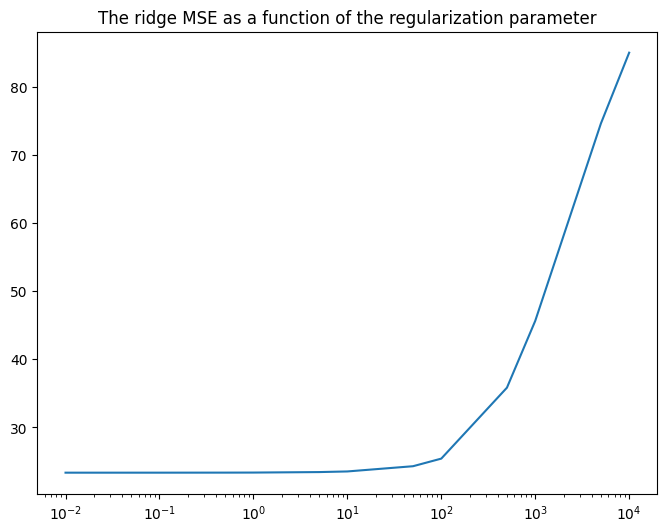

In [14]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

[```sklearn.linear_model.Lasso```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

minimize 1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_tn_std, y_tn)
print(lasso.coef_, lasso.intercept_)

[-0.65921176  0.67141808 -0.          0.6081466  -1.38630931  2.47836718
  0.         -2.41803101  0.79206023 -0.1519815  -2.07756976  1.07816087
 -3.81447389] 22.687862796833812


In [16]:
L_coefs = []
L_errs = []

alphas = np.arange(0.1, 10, 0.1)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_tn_std, y_tn)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_te, lasso.predict(X_te_std)))

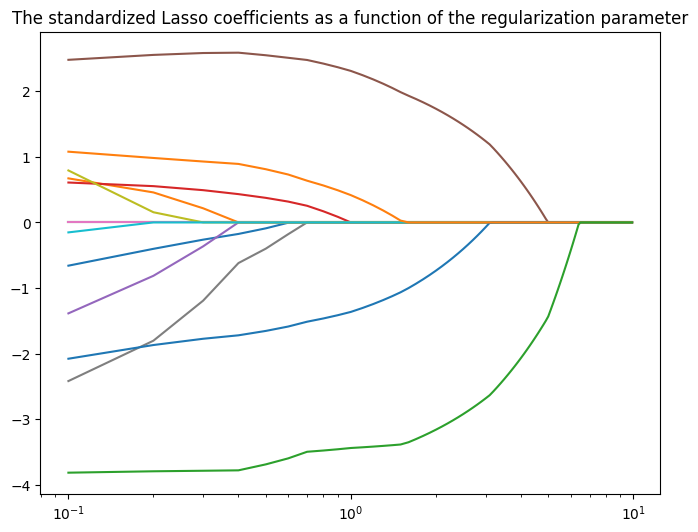

In [17]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

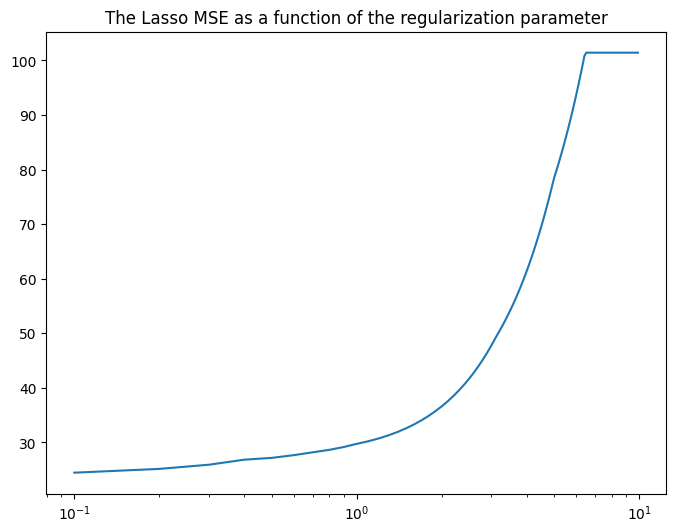

In [18]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### with K-fold cross validation

In [19]:
from sklearn.model_selection import KFold

In [20]:
import numpy as np
alphas = np.arange(0.01, 10, 0.01)

errs_alpha = [] # alpha별 에러

for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        ridge = Ridge(alpha = a)
        ridge.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))
        
    errs_alpha.append(np.mean(kfold_errs))

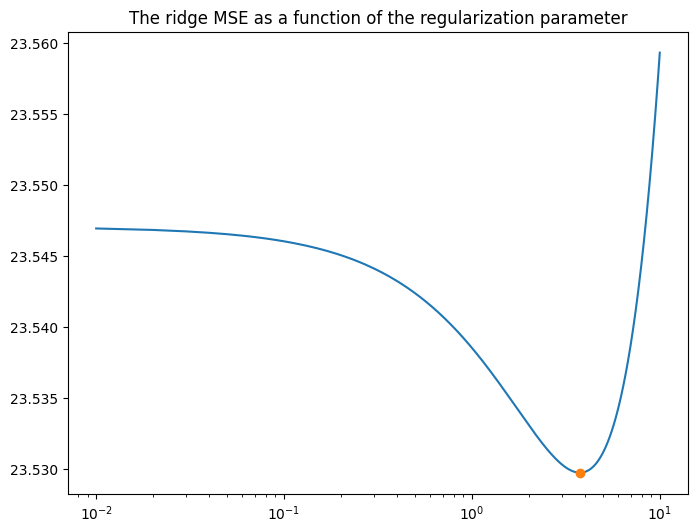

In [21]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

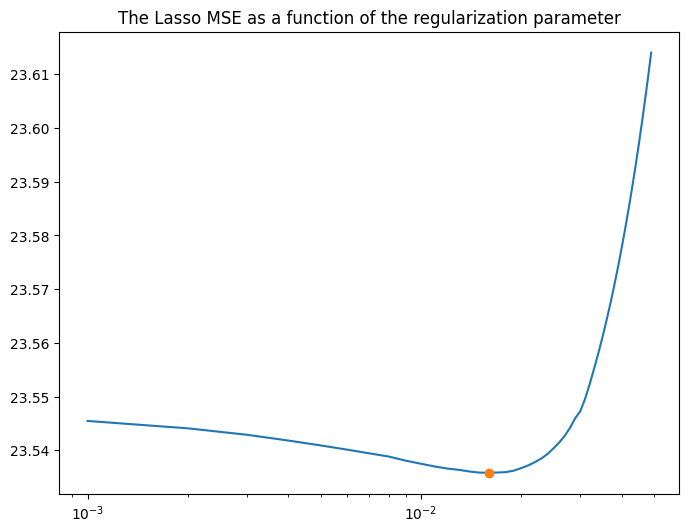

In [22]:
alphas = np.arange(0.001, 0.05, 0.001)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)

    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        lasso = Lasso(alpha = a)
        lasso.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))
        
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

### sklearn에서의 ElasticNet

[```sklearn.linear_model.ElasticNet```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

minimize 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [23]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic.fit(X_tn_std, y_tn)

ElasticNet(alpha=0.1)

In [24]:
print(elastic.coef_, elastic.intercept_)

[-0.70727303  0.71831124 -0.08371113  0.63556058 -1.21740256  2.50072983
 -0.         -2.25160896  0.95922281 -0.40555035 -1.9849518   1.10190866
 -3.56954087] 22.68786279683381


In [25]:
pred_lr = lr.predict(X_te_std)
pred_ridge = ridge.predict(X_te_std)
pred_lasso = lasso.predict(X_te_std)
pred_elastic = elastic.predict(X_te_std)

In [26]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_te, pred_lr))
print(mean_squared_error(y_te, pred_ridge))
print(mean_squared_error(y_te, pred_lasso))
print(mean_squared_error(y_te, pred_elastic))

23.371646035297434
22.001309709447114
22.046222857341668
24.15349222083002


#### Hitter example

In [27]:
import pandas as pd
df = pd.read_csv('https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv')
df = df.dropna(axis=0)
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [28]:
from sklearn.model_selection import train_test_split

y = df["Salary"]
X = df.iloc[:, 1:]
X = X.drop(["Salary", "League", "Division", "NewLeague"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)   
ridge.fit(X_train_std, y_train)
print(ridge.coef_, ridge.intercept_)

[-273.52527198  263.12265068   -4.30821411   33.83694078   25.35135217
   92.82967199  -66.38599142 -176.57847564   72.1387834   -22.42620075
  297.50166453  243.67172382 -156.63109143   81.07439184   60.32747197
  -35.2313729 ] 547.3495634517767


In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error

alphas = np.array([0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])

coefs = []
errs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_std, y_train)
    coefs.append(ridge.coef_)
    errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))

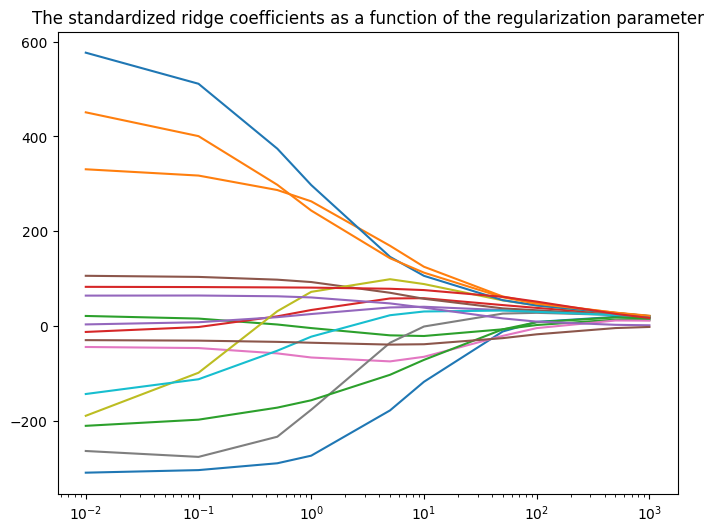

In [32]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.title("The standardized ridge coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

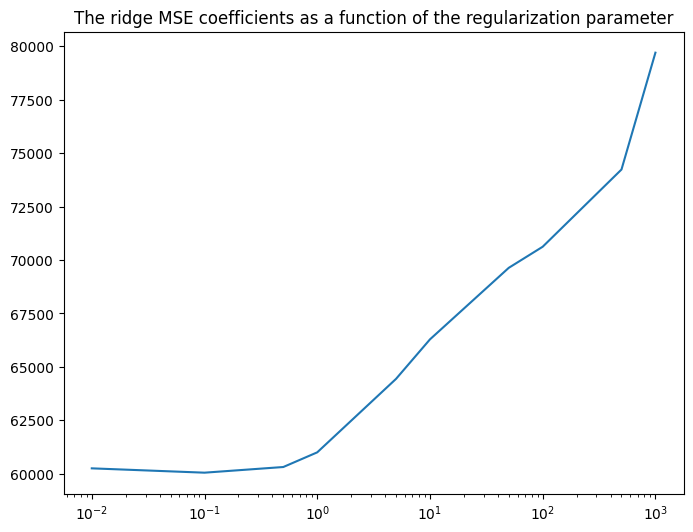

In [33]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs)
ax.set_xscale("log")
plt.title("The ridge MSE coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1) 
lasso.fit(X_train_std, y_train)
print(lasso.coef_, lasso.intercept_)

[-287.32905228  296.25926403    0.           13.8329246    17.89489194
   97.05385644  -59.24511717 -165.61071858    0.          -26.68283011
  358.03919121  253.65425602 -168.90012564   80.72249586   55.96078391
  -29.77077344] 547.3495634517767


In [35]:
L_coefs = []
L_errs = []

alphas = np.array([0.5, 1, 2.5, 5, 10, 25, 50, 100])

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=2000)
    lasso.fit(X_train_std, y_train)
    L_coefs.append(lasso.coef_)
    L_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))

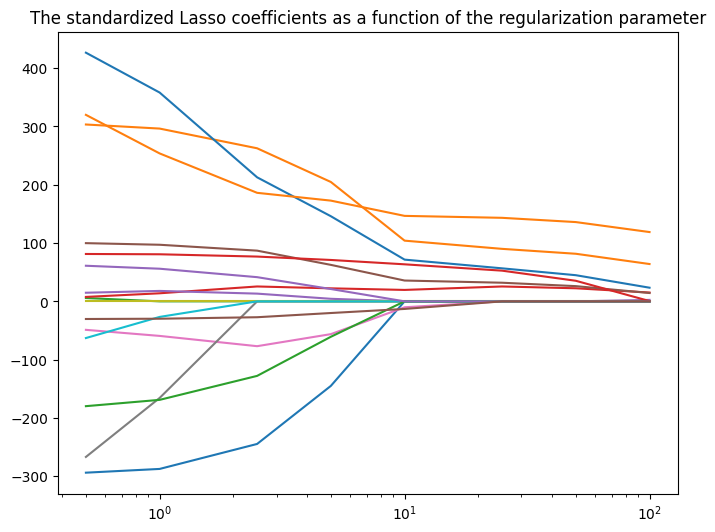

In [36]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_coefs)
ax.set_xscale("log")
plt.title("The standardized Lasso coefficients as a function of the regularization parameter")
plt.axis("tight")
plt.show()

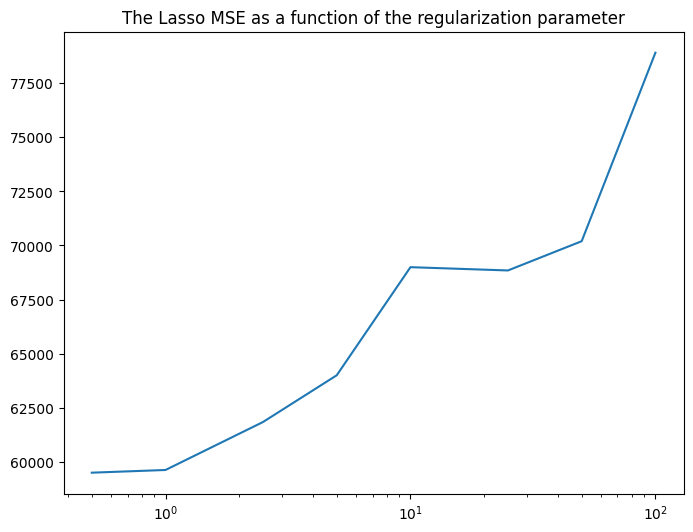

In [37]:
plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, L_errs)
ax.set_xscale("log")
plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

#### with k-fold

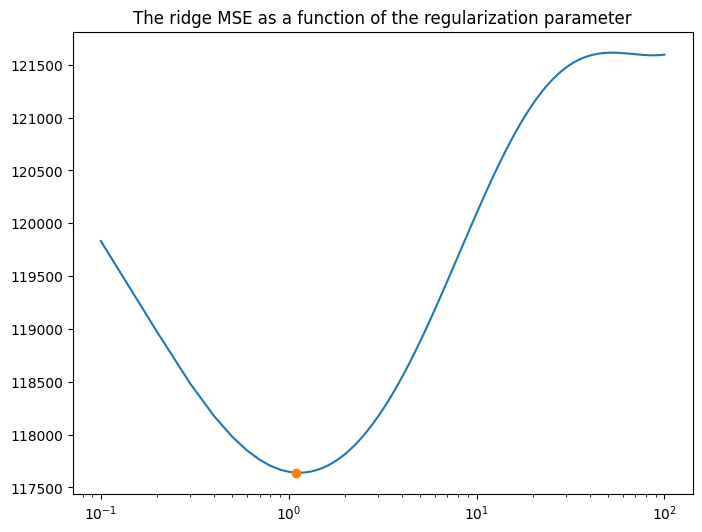

In [38]:
from sklearn.model_selection import KFold
alphas = np.arange(0.1, 100, 0.1)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        ridge = Ridge(alpha=a)
        ridge.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, ridge.predict(X_test_std)))
                
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The ridge MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()

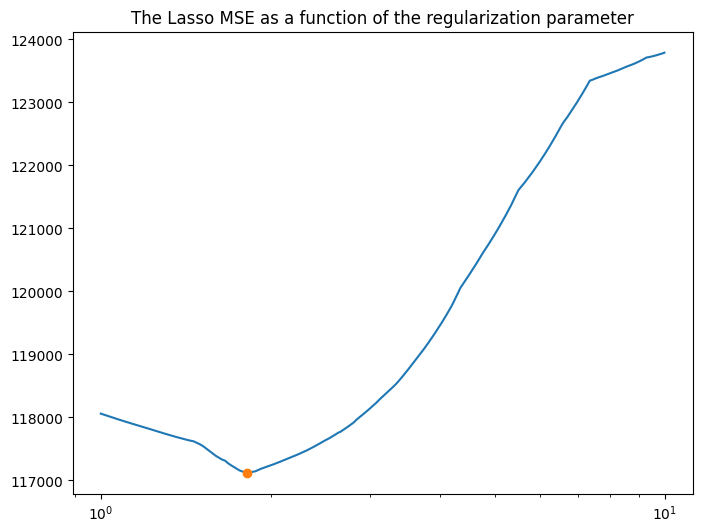

In [39]:
from sklearn.model_selection import KFold
alphas = np.arange(1, 10, 0.02)

errs_alpha = [] # alpha별 에러


for a in alphas:
    
    kfold_errs = []  # 각 폴드 별 에러
    
    kf = KFold(n_splits = 5, shuffle=True, random_state=1)
    
    for train_index, test_index in kf.split(X):
    
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        std_scale = StandardScaler()
        std_scale.fit(X_train)
        
        X_train_std = std_scale.transform(X_train)
        X_test_std = std_scale.transform(X_test)
        
        lasso = Lasso(alpha=a, max_iter=2000)
        lasso.fit(X_train_std, y_train)
        
        kfold_errs.append(mean_squared_error(y_test, lasso.predict(X_test_std)))
                
    errs_alpha.append(np.mean(kfold_errs))
    

plt.figure(figsize=(8, 6))

ax = plt.gca()
ax.plot(alphas, errs_alpha)
ax.set_xscale("log")
ax.plot(alphas[np.argmin(errs_alpha)], np.min(errs_alpha), marker = 'o')

plt.title("The Lasso MSE as a function of the regularization parameter")
plt.axis("tight")
plt.show()